In [1]:
import sys
sys.path.insert(0, "../../src")
from earthtext.api import osmencoderauto

# setup

- select a folder to hold model and data, `$OSMENCODER_FOLDER`

- copy into `$OSMENCODER_FOLDER` the following files
 
    - `s3://clay-text/models/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt`
    - `s3://clay-text/models/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.yaml`
    - `s3://clay-text/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2.parquet` 
    - `s3://clay-text/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2_embeddings_v1.0_meansstdevs.pkl`
 
- check that the property `metadata_file` on the `yaml` file points to the `parquet` file


# load and initialize helper object


In [2]:
model_ckpt_fname = '/opt/data/models/published/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt'
norm_constants_fname = '/opt/data/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2_embeddings_v1.0_meansstdevs.pkl'
osmenc = osmencoderauto.OSMEncoderWithAutocompletion(model_ckpt_fname, norm_constants_fname)
osmenc.setup()

2024-05-20 23:32:05.150 | INFO     | earthtext.api.osmencoderauto:__init__:32 - osmencoder model is /opt/data/models/published/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt
2024-05-20 23:32:05.151 | INFO     | earthtext.api.osmencoderauto:__init__:33 - autocompletion source is 'train'
2024-05-20 23:32:05.158 | INFO     | earthtext.api.osmencoderauto:setup:51 - loading model
2024-05-20 23:32:05.212 | INFO     | earthtext.api.osmencoderauto:setup:55 - initializing dataloaders
2024-05-20 23:32:06.298 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:109 - read train split with 58690 chip files (out of 58690)
2024-05-20 23:32:06.299 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:114 - max cache size is -1
2024-05-20 23:32:06.752 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:109 - read val split with 11841 chip files (out of 11841)
2024-05-20 23:32:06.753 | INFO     | earthtext.datamodules.components.chipmu

# make a query

In [49]:
min_counts, max_counts = {'sport=baseball':1 }, {'building=*': 0}
min_areas,  max_areas  = {}, {}

emb = osmenc.predict_embedding(min_counts, max_counts, min_areas, max_areas)

((768,), -0.05600655)

Text(0.5, 1.0, 'predicted embeddings')

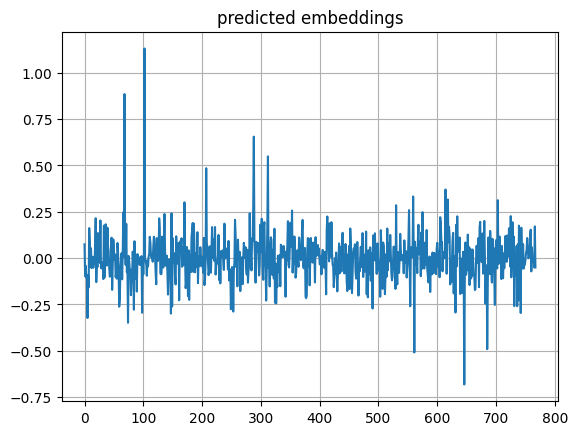

In [54]:
import matplotlib.pyplot as plt
plt.plot(emb)
plt.grid()
plt.title("predicted embeddings")